# Implementación Módulo 2

In [64]:
import pandas as pd
import numpy as np

In [65]:
#Leemos el dataset procesado
df = pd.read_csv("Datasets/processed_df.csv", sep=";")

In [67]:
df[["lemmatized_post", "stemmed_post", "clean_post", "clean_title"]] = df[["lemmatized_post", "stemmed_post", "clean_post", "clean_title"]].astype(str)

In [68]:
df.isna().sum()

created_date       0
subreddit          0
title              0
author             0
full_link          0
score              0
post               0
sentiment          0
lemmatized_post    0
stemmed_post       0
clean_post         0
clean_title        0
dtype: int64

Como arriba lo hemos convertido a strings no hace falta eliminar nada pero si no veríamos que algunos posts al hacer el preprocesamiento contenían solo caracteres no alfanumericos y entonces quedarían Nan

Habría que eliminarlos df.dropna(subset=["lemmatized_post"], inplace=True)

Creemos que el titulo da bastante informacion asi que lo vamos a juntar con el post y ese va a ser el texto que vamos a analizar

In [71]:
df["post_to_analize"] = df["lemmatized_post"] + " " + df["clean_title"].astype(str)

In [72]:
df

,created_date,subreddit,title,author,full_link,score,post,sentiment,lemmatized_post,stemmed_post,clean_post,clean_title,post_to_analize
0,2009-06-23 16:50:44,artificial,Are worms intelligent?,ithkuil,https://www.reddit.com/r/artificial/comments/8...,3,This is me trying to start thinking about my o...,0,trying start thinking understanding intelligen...,tri start think understand intellig idea mayb ...,trying start thinking understanding intelligen...,worm intelligent,trying start thinking understanding intelligen...
1,2009-07-01 23:59:58,statistics,Is a masters in Statistics worth it?,nazghash,https://www.reddit.com/r/statistics/comments/8...,8,I'm working on an MS in Statistics at a state ...,0,working statistic state school curious useful ...,work ms statist state school curiou use ultim ...,working ms statistics state school curious use...,master statistic worth,working statistic state school curious useful ...
2,2009-07-05 07:39:04,statistics,Books/resources that discuss change point anal...,Abhishek_Ghose,https://www.reddit.com/r/statistics/comments/8...,2,I am looking for books/online-resources that d...,1,looking book online resource discus change poi...,look book onlin resourc discuss chang point an...,looking books online resources discuss change ...,book resource discus change point analysis,looking book online resource discus change poi...
3,2009-07-07 03:58:15,statistics,Pari-Mutuel Horse Racing Pool?,painperdu,https://www.reddit.com/r/statistics/comments/8...,0,Anyone study angles on how to beat a pari-mutu...,0,anyone study angle beat pari mutuel pool horse...,anyon studi angl beat pari mutuel pool hors ra...,anyone study angles beat pari mutuel pool hors...,pari mutuel horse racing pool,anyone study angle beat pari mutuel pool horse...
4,2009-07-21 16:55:04,statistics,Ask Stats: I got a BS in stats and I'm startin...,mathsuu,https://www.reddit.com/r/statistics/comments/9...,0,I should mention that I know SAS and R pretty ...,0,mention know sa pretty well sa certified yet t...,mention know sa pretti well sa certifi yet tak...,mention know sas pretty well sas certified yet...,ask stats got stats starting fall looking job ...,mention know sa pretty well sa certified yet t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274198,2022-05-08 18:00:10,MachineLearning,[D] Simple Questions Thread,AutoModerator,https://www.reddit.com/r/MachineLearning/comme...,1,Please post your questions here instead of cre...,0,please post question instead creating new thre...,pleas post question instead creat new thread e...,please post questions instead creating new thr...,simple question thread,please post question instead creating new thre...
274199,2022-05-08 18:13:53,computerscience,Question about binary code and files identity,pc0999,https://www.reddit.com/r/computerscience/comme...,1,"Hi, \n\nI am a philosophy student writing an e...",0,hi philosophy student writing essay digital th...,hi philosophi student write essay digit thing ...,hi philosophy student writing essay digital th...,question binary code file identity,hi philosophy student writing essay digital th...
274200,2022-05-08 18:15:56,dataengineering,Creating a data pipeline in AWS,OinkOink9,https://www.reddit.com/r/dataengineering/comme...,1,I want to create a data pipeline in AWS (free-...,0,want create data pipeline aws free tier accoun...,want creat data pipelin aw free tier account u...,want create data pipeline aws free tier accoun...,creating data pipeline aws,want create data pipeline aws free tier accoun...
274201,2022-05-08 19:01:40,dataengineering,I have a free pass to MLOps World in Toronto C...,Quiet_Basket_9699,https://www.reddit.com/r/dataengineering/comme...,1,You can see workshops etc www.MLOps world.com,1,see workshop etc,see workshop etc,see workshops etc,free pas mlops world toronto canada message in...,see workshop etc free pas mlops world toronto ...


# TFIDF

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [74]:
tfidf = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf.fit_transform(df["post_to_analize"])

In [75]:
df.subreddit.unique()

array(['artificial', 'statistics', 'MachineLearning', 'computervision',
       'rstats', 'analytics', 'datasets', 'computerscience',
       'AskStatistics', 'data', 'datascience', 'MLQuestions',
       'DataScienceJobs', 'deeplearning', 'dataengineering',
       'dataanalysis', 'learnmachinelearning', 'kaggle',
       'datascienceproject'], dtype=object)

Como las etiquetas son texto y no podemos meter texto como input a un modelo de ML utilizamos un encoder.

In [76]:
encoder = LabelEncoder()
Y = encoder.fit_transform(df.subreddit)

##### Probamos diferentes modelos y nos quedamos con el mejor

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import time


def train_models(X, Y):
    
    # Spliteamos el dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Modelos a probar
    models = {
        "Logistic Regression": LogisticRegression(max_iter=5000, n_jobs=-1),
        #"Naive Bayes": MultinomialNB(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1),
        #"Gradient Boosting": GradientBoostingClassifier(max_depth=3,random_state=42)
    }

    # Probamos cada modelo
    results = {}
    for model_name, model in models.items():
        print(f"Entrenando: {model_name}")
        start = time.time()
        model.fit(X_train, Y_train)  
        end = time.time()
        Y_pred = model.predict(X_test)
        
        # Evaluamos el modelo
        accuracy = accuracy_score(Y_test, Y_pred)
        f1score = f1_score(Y_test, Y_pred, average='weighted')
        print(f"Tiempo de entrenamiento de {model_name}: {end - start:.2f}s")
        print(f"{model_name} Accuracy: {accuracy:.2f}")
        print(f"{model_name} F1 Score: {f1score:.2f}")
        print(classification_report(Y_test, Y_pred, target_names=encoder.classes_))
        # Nos guardamos los resultados
        results[model_name] = accuracy, f1score

    # Nos quedamos con el mejor modelo
    best_model = max(results, key=results.get)
    print(f"El mejor modelo es: {best_model} con una precisión de {results[best_model][0]:.2f} y un f1-score de {results[best_model][1]:.2f}")
    return results



In [80]:
results = train_models(X_tfidf, Y)

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 46.35s
Logistic Regression Accuracy: 0.56
Logistic Regression F1 Score: 0.54
                      precision    recall  f1-score   support

       AskStatistics       0.51      0.58      0.54      8901
     DataScienceJobs       0.89      0.62      0.73       687
         MLQuestions       0.23      0.04      0.07      3516
     MachineLearning       0.48      0.60      0.54     11404
           analytics       0.76      0.65      0.70      2372
          artificial       0.59      0.47      0.52      2601
     computerscience       0.72      0.84      0.77      6865
      computervision       0.60      0.61      0.60      2786
                data       0.71      0.26      0.38       848
        dataanalysis       0.48      0.15      0.23      1210
     dataengineering       0.78      0.71      0.74      2445
         datascience       0.59      0.65      0.62     11285
  datascienceproject       0.00     

/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Tiempo de entrenamiento de Random Forest: 169.22s
Random Forest Accuracy: 0.52
Random Forest F1 Score: 0.49
                      precision    recall  f1-score   support

       AskStatistics       0.46      0.65      0.54      8901
     DataScienceJobs       0.93      0.57      0.71       687
         MLQuestions       0.05      0.01      0.01      3516
     MachineLearning       0.43      0.61      0.51     11404
           analytics       0.79      0.56      0.65      2372
          artificial       0.55      0.44      0.49      2601
     computerscience       0.66      0.81      0.72      6865
      computervision       0.59      0.51      0.55      2786
                data       0.73      0.24      0.36       848
        dataanalysis       0.21      0.03      0.05      1210
     dataengineering       0.79      0.60      0.68      2445
         datascience       0.55      0.66      0.60     11285
  datascienceproject       0.05      0.01      0.02        73
            datasets   

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_results_from_training(results):
    model_names = list(results.keys())
    f1scores = [acc[1] for acc in results.values()]  # Nos quedamos con el f1_score de cada modelo

    palette = sns.color_palette("viridis", len(model_names))

    # Creamos el gráfico
    plt.figure(figsize=(10, 6))
    bars = plt.barh(model_names, f1scores, color=palette, height=0.4)
    plt.xlabel('Precisión')
    plt.title('Resultados de los Modelos')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Añadimos etiquetas de precisión en las barras
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
                va='center', ha='left', fontsize=10)

    plt.show()

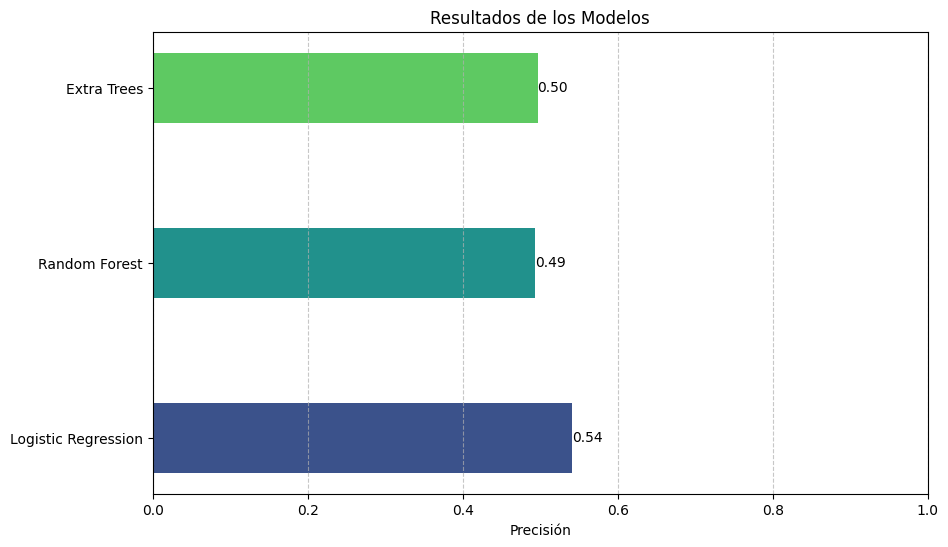

In [82]:
plot_results_from_training(results)

# NER (Name Entity Recognition)

In [83]:
import spacy

In [84]:
nlp = spacy.load("en_core_web_sm")

In [85]:
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

In [86]:
df["entities"] = df["post_to_analize"].apply(extract_entities)

In [87]:
df["entities"].to_csv("Datasets/entities.csv", index=False)

In [88]:
df["entities"]

0                                                []
1                                                []
2                                                []
3                 [pari mutuel, three, pari mutuel]
4         [anova nonparametric, intro, next summer]
                            ...                    
274198                                           []
274199                                   [two, two]
274200                                      [ec ec]
274201                            [toronto, canada]
274202                                           []
Name: entities, Length: 274203, dtype: object

In [89]:
tfidf = TfidfVectorizer(max_features=1000)
X_ent = tfidf.fit_transform(df["entities"].apply(lambda x: " ".join(x)))

In [90]:
results = train_models(X_ent, Y)

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 11.31s
Logistic Regression Accuracy: 0.23
Logistic Regression F1 Score: 0.20
                      precision    recall  f1-score   support

       AskStatistics       0.25      0.37      0.30      8901
     DataScienceJobs       0.60      0.24      0.35       687
         MLQuestions       0.06      0.00      0.00      3516
     MachineLearning       0.17      0.60      0.26     11404
           analytics       0.48      0.23      0.31      2372
          artificial       0.32      0.03      0.05      2601
     computerscience       0.38      0.14      0.20      6865
      computervision       0.33      0.06      0.10      2786
                data       0.72      0.15      0.25       848
        dataanalysis       0.00      0.00      0.00      1210
     dataengineering       0.44      0.08      0.14      2445
         datascience       0.26      0.32      0.29     11285
  datascienceproject       0.00     

/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Tiempo de entrenamiento de Random Forest: 14.38s
Random Forest Accuracy: 0.21
Random Forest F1 Score: 0.18
                      precision    recall  f1-score   support

       AskStatistics       0.24      0.33      0.28      8901
     DataScienceJobs       0.52      0.29      0.38       687
         MLQuestions       0.08      0.01      0.02      3516
     MachineLearning       0.26      0.18      0.22     11404
           analytics       0.43      0.24      0.31      2372
          artificial       0.16      0.03      0.05      2601
     computerscience       0.33      0.13      0.19      6865
      computervision       0.23      0.05      0.09      2786
                data       0.63      0.19      0.30       848
        dataanalysis       0.06      0.01      0.01      1210
     dataengineering       0.32      0.07      0.12      2445
         datascience       0.17      0.65      0.26     11285
  datascienceproject       0.00      0.00      0.00        73
            datasets    

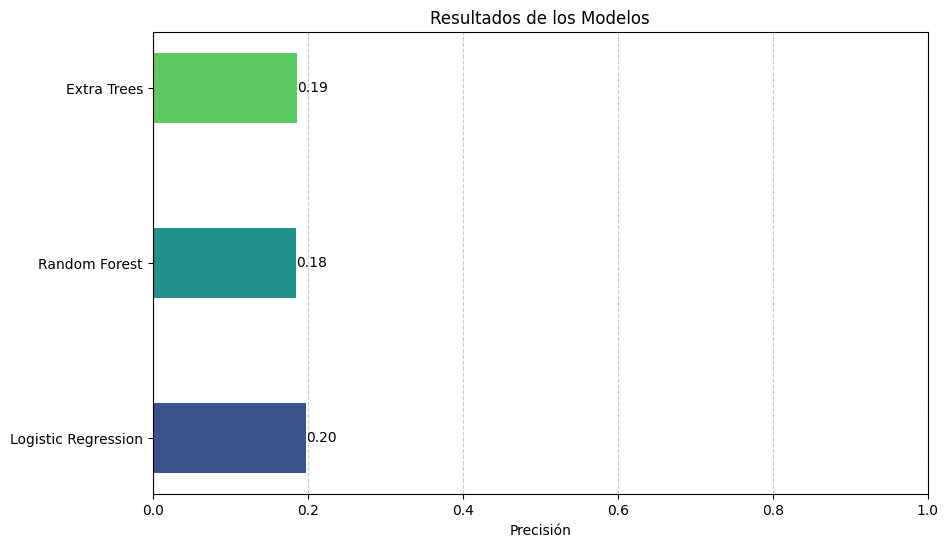

In [91]:
plot_results_from_training(results)

Los resultados son bastante pobres porque es díficil que el modelo prediga bien a partir de información tan escasa como las entidades de un texto y más cuando hay muchos posts en los que no se reconoce ninguna entidad.

# Embeddings

### Primer approach con spacy embeddings

In [92]:
def text_to_embeddings(text):
    doc = nlp(text)
    return doc.vector

In [93]:
X_embeddings = df["post_to_analize"].apply(text_to_embeddings)
#25 min

In [94]:
X_embeddings = np.array(X_embeddings.tolist())

In [95]:
results = train_models(X_embeddings, Y)

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 31.44s
Logistic Regression Accuracy: 0.31
Logistic Regression F1 Score: 0.28
                      precision    recall  f1-score   support

       AskStatistics       0.32      0.41      0.36      8901
     DataScienceJobs       0.72      0.48      0.58       687
         MLQuestions       0.00      0.00      0.00      3516
     MachineLearning       0.27      0.46      0.34     11404
           analytics       0.39      0.14      0.20      2372
          artificial       0.46      0.24      0.31      2601
     computerscience       0.35      0.34      0.35      6865
      computervision       0.25      0.07      0.11      2786
                data       0.62      0.09      0.15       848
        dataanalysis       0.28      0.01      0.03      1210
     dataengineering       0.26      0.07      0.11      2445
         datascience       0.32      0.56      0.41     11285
  datascienceproject       0.00     

/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ivan/Desktop/2_CDIA/NLP/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Tiempo de entrenamiento de Random Forest: 32.89s
Random Forest Accuracy: 0.25
Random Forest F1 Score: 0.22
                      precision    recall  f1-score   support

       AskStatistics       0.24      0.34      0.28      8901
     DataScienceJobs       0.75      0.47      0.58       687
         MLQuestions       0.05      0.01      0.01      3516
     MachineLearning       0.23      0.41      0.29     11404
           analytics       0.31      0.02      0.03      2372
          artificial       0.34      0.09      0.14      2601
     computerscience       0.29      0.24      0.26      6865
      computervision       0.14      0.01      0.02      2786
                data       0.66      0.18      0.28       848
        dataanalysis       0.08      0.01      0.01      1210
     dataengineering       0.27      0.02      0.03      2445
         datascience       0.29      0.52      0.37     11285
  datascienceproject       0.00      0.00      0.00        73
            datasets    

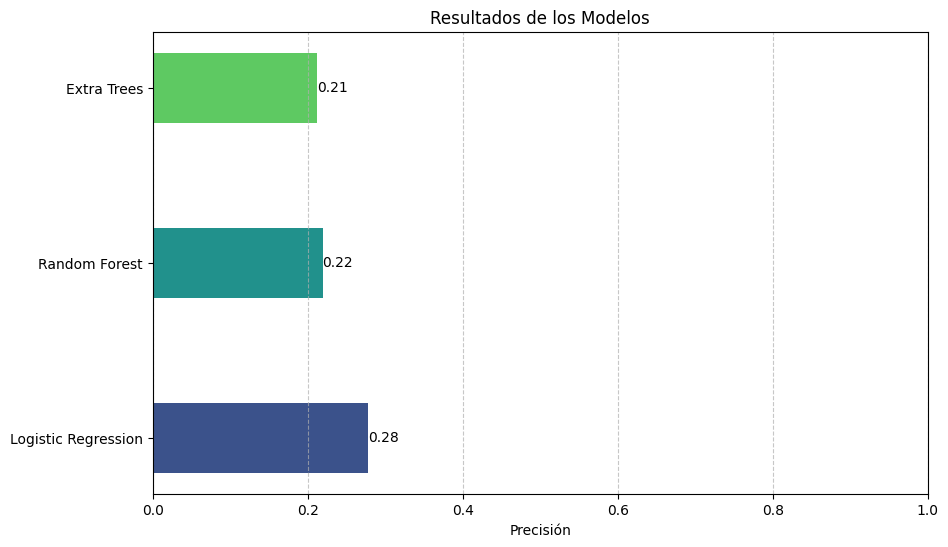

In [96]:
plot_results_from_training(results)

Este enfoque requiere bastante tiempo de computación ya que al hacer nlp(texto) se aplica todo una serie de operaciones como tokenizacion, lematización, postagging... que realiza spacy. 

Además los resultados no son tan buenos ya que se utilizan embeddings más generales a diferencia de GloVe

### Segundo approach con Glove Embeddings

En vez de tener que convertir cada palabra a un vector como hacíamos con spacy, tenemos un diccionario de palabras y sus correspodientes vectores salido a partir de un modelo ya entrenado. Hacemos el mapping y entrenamos con distintos modelos para ver cual es el mejor.

In [97]:
def load_glove():
    with open("Datasets/glove.6B.300d.txt", "r") as file:
        embeddings = {}
        for line in file:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
            
        return embeddings
    

embeddings = load_glove()

def text_to_glove(text):
    words = text.split()
    vectors = [embeddings[word] for word in words if word in embeddings]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(300)

In [98]:
X_glove = df["lemmatized_post"].apply(text_to_glove)

X_glove = np.array(X_glove.tolist())

In [99]:
results = train_models(X_glove, Y)

Entrenando: Logistic Regression
Tiempo de entrenamiento de Logistic Regression: 89.43s
Logistic Regression Accuracy: 0.45
Logistic Regression F1 Score: 0.43
                      precision    recall  f1-score   support

       AskStatistics       0.47      0.55      0.51      8901
     DataScienceJobs       0.75      0.51      0.61       687
         MLQuestions       0.14      0.01      0.01      3516
     MachineLearning       0.38      0.54      0.45     11404
           analytics       0.64      0.53      0.58      2372
          artificial       0.52      0.32      0.40      2601
     computerscience       0.54      0.64      0.59      6865
      computervision       0.46      0.40      0.43      2786
                data       0.62      0.21      0.31       848
        dataanalysis       0.35      0.05      0.09      1210
     dataengineering       0.58      0.46      0.51      2445
         datascience       0.47      0.60      0.53     11285
  datascienceproject       0.00     

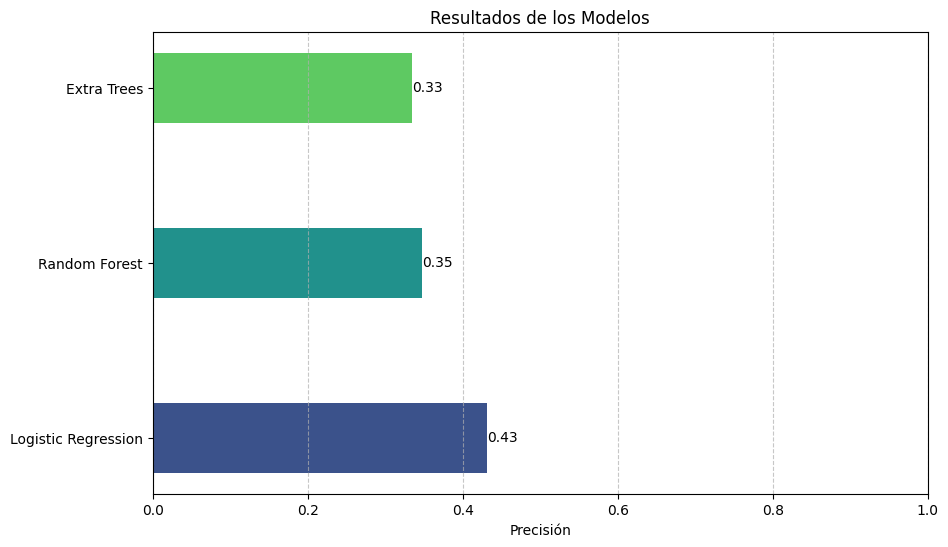

In [100]:
plot_results_from_training(results)

Vemos que da un mejor resultado que mediante embeddings con spacy ya que los embeddings de GloVe son más específicos y funcionan mejor para análisis de posts en redes sociales que es nuestro caso.

# Función clasificar texto

El mejor método ha sido TFIDF asi que lo vamos a implementar en una función para predecir el subreddit de un texto.

In [102]:
def classify_subreddit(text:str):
    tfidf = TfidfVectorizer(max_features=10000)
    X_tfidf = tfidf.fit_transform(df["post_to_analize"])
    encoder = LabelEncoder()
    Y = encoder.fit_transform(df.subreddit)
    model = LogisticRegression(max_iter=5000, n_jobs=-1)
    model.fit(X_tfidf, Y)
    X_test = tfidf.transform([text])
    Y_pred = model.predict(X_test)
    return encoder.classes_[Y_pred][0]
    

In [103]:
classify_subreddit("I need help with my computer")

'computerscience'